# Spaceship Titanic
# Predict which passengers are transported to an alternate dimension

## Initial

Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
from collections import Counter
sns.set() 

Uploading datasets

In [2]:
train = pd.read_csv('./train.csv', index_col='PassengerId')
test = pd.read_csv('./test.csv', index_col='PassengerId')

### Age vs. Transported

<Axes: xlabel='VIP', ylabel='Age'>

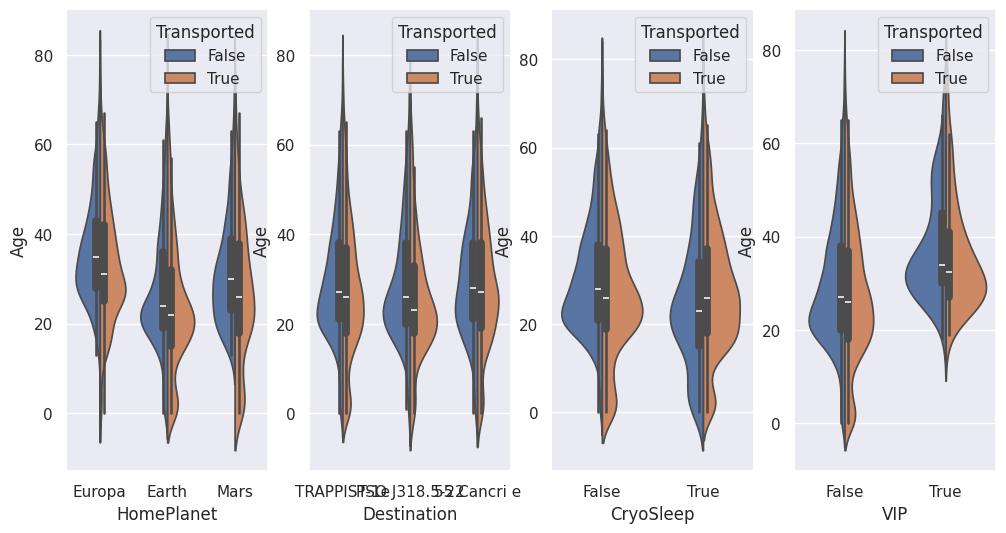

In [3]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)


sns.violinplot(x="HomePlanet", y="Age", hue="Transported", data=train, split=True, ax=ax1)
sns.violinplot(x="Destination", y="Age", hue="Transported", data=train, split=True, ax=ax2)
sns.violinplot(x="CryoSleep", y="Age", hue="Transported", data=train, split=True, ax=ax3)
sns.violinplot(x="VIP", y="Age", hue="Transported", data=train, split=True, ax=ax4)

/tmp/ipykernel_96778/3584516129.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total_transported['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue', ax = ax1)
/tmp/ipykernel_96778/3584516129.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total_not_transported['Age'

/tmp/ipykernel_96778/3584516129.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(not_sleep_transported['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue', ax=ax3)
/tmp/ipykernel_96778/3584516129.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(not_sleep_not_transported

<Axes: xlabel='Not sleep'>

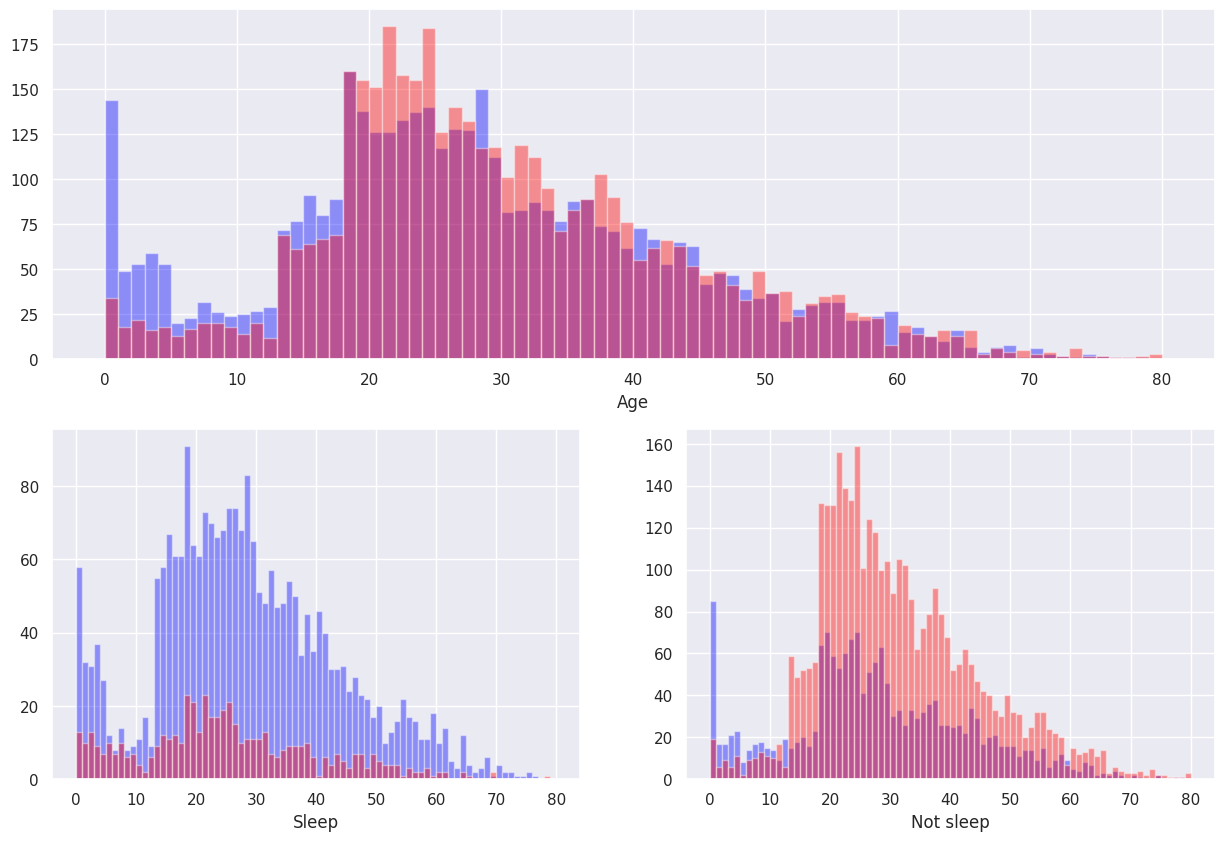

In [4]:
total_transported = train[train['Transported']==1]
total_not_transported = train[train['Transported']==0]
sleep_transported = train[(train['Transported']==1) & (train['CryoSleep']==1)]
not_sleep_transported = train[(train['Transported']==1) & (train['CryoSleep']==0)]
sleep_not_transported = train[(train['Transported']==0) & (train['CryoSleep']==1)]
not_sleep_not_transported = train[(train['Transported']==0) & (train['CryoSleep']==0)]

fig = plt.figure(figsize=[15,10])
ax1 = fig.add_subplot(211)
sns.distplot(total_transported['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue', ax = ax1)
sns.distplot(total_not_transported['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Age', ax = ax1)

ax2 = fig.add_subplot(223)
sns.distplot(sleep_transported['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue', ax = ax2)
sns.distplot(sleep_not_transported['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Sleep', ax = ax2)

ax3 = fig.add_subplot(224)
sns.distplot(not_sleep_transported['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue', ax=ax3)
sns.distplot(not_sleep_not_transported['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Not sleep', ax=ax3)

People who slept between the ages of 15 and 30 were transported the most

## Filling in the gaps

In [5]:
train_test_data = [train, test]

### CryoSleep, VIP, Transported

In [6]:
print(Counter(train['CryoSleep']))
bool_features = ['CryoSleep', 'VIP']
for dataset in train_test_data:
    for i in dataset.index:
        for feature in bool_features:
            if dataset.loc[i, feature] not in [True,False]:
                dataset.loc[i, feature] = random.choice([True,False])
Counter(train['CryoSleep'])

Counter({False: 5439, True: 3037, nan: 217})


Counter({False: 5541, True: 3152})

### HomePlanet, Destination

In [7]:
train['HomePlanet'] = train['HomePlanet'].fillna(random.choice(['Mars','Earth','Europa']))
test['HomePlanet'] = test['HomePlanet'].fillna(random.choice(['Mars','Earth','Europa']))
train['Destination'] = train['Destination'].fillna(random.choice(['TRAPPIST-1e','PSO J318.5-22','55 Cancri e']))
test['Destination'] = test['Destination'].fillna(random.choice(['TRAPPIST-1e','PSO J318.5-22','55 Cancri e']))

### Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

In [8]:
list_of_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for feature in list_of_features:
    train[feature] = train[feature].fillna(train[feature].mean())
    test[feature] = test[feature].fillna(test[feature].mean())

### Cabin

In [9]:
deck = []
side = []
deck_t = []
side_t = []
for i in train.index:
    if str(train.loc[i,"Cabin"]) == 'nan':
        deck.append(random.choice(['B','C']))
        side.append(random.choice(['S','P']))
    else:  
        deck.append(train.loc[i,"Cabin"][0])
        side.append(train.loc[i,'Cabin'][-1])
for i in test.index:
    if str(test.loc[i,"Cabin"]) == 'nan':
        deck_t.append(random.choice(['B','C']))
        side_t.append(random.choice(['S','P']))
    else:  
        deck_t.append(test.loc[i,"Cabin"][0])
        side_t.append(test.loc[i,'Cabin'][-1])

train['Deck'] = deck
train['Side'] = side
test['Deck'] = deck_t
test['Side'] = side_t

### Drop Cabin, Name

In [10]:
train = train.drop(columns=['Cabin', 'Name'])
test = test.drop(columns=['Cabin', 'Name'])


In [11]:
train.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Side            0
dtype: int64

## Feature Extraction

### New Column: TotalMoney

In [12]:
train['TotalMoney'] = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
test['TotalMoney'] = test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

<Axes: xlabel='Transported', ylabel='TotalMoney'>

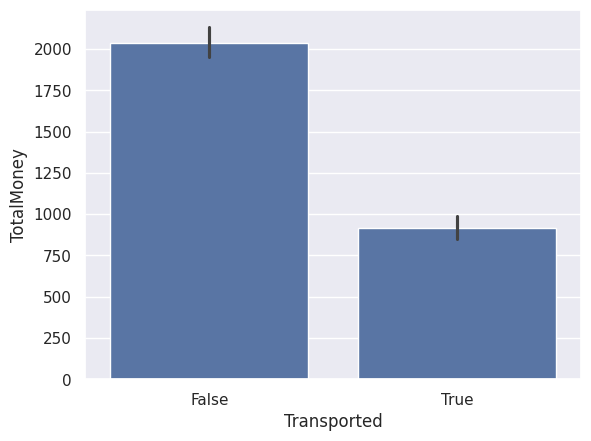

In [13]:
sns.barplot(x='Transported', y='TotalMoney', data=train)

The total amount of money spent by the passenger greatly affects the transportation

In [14]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side,TotalMoney
PassengerId,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P,0.0
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S,736.0
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S,10383.0
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S,5176.0
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S,1091.0


### Side

In [15]:
side_dict = {'P': 0, 'S': 1}
train['Side'] = train['Side'].apply(lambda x: side_dict.get(x))
test['Side'] = test['Side'].apply(lambda x: side_dict.get(x))

### CryoSleep, VIP, Transported

In [16]:
bool_mapping = {'False': 0, 'True': 1}
bool_features = ['CryoSleep', 'VIP']

for name in bool_features:
    train[name] = train[name].astype(int)
    test[name] = test[name].astype(int)
train['Transported'] = train['Transported'].astype(int)

### Age

In [17]:
age_group = []

for i in train.values:
  if i[3] <= 12:
    age_group.append('0-12')
  elif 18 >= i[3] >= 13:
    age_group.append('13-18')
  elif 25 >= i[3] >= 18 :
    age_group.append('19-25')
  elif 30 >= i[3] >= 26 :
    age_group.append('26-30')
  elif 50 >= i[3] >= 31 :
    age_group.append('31-50')
  elif i[3] >= 51 :
    age_group.append('>50')          
train['AgeGroup'] = age_group

In [18]:
age_group_test = []

for i in test.values:
  if i[3] <= 12:
    age_group_test.append('0-12')
  elif 18 >= i[3] >= 13:
    age_group_test.append('13-18')
  elif 25 >= i[3] >= 18 :
    age_group_test.append('19-25')
  elif 30 >= i[3] >= 26 :
    age_group_test.append('26-30')
  elif 50 >= i[3] >= 31 :
    age_group_test.append('31-50')
  elif i[3] >= 51 :
    age_group_test.append('>50')          
test['AgeGroup'] = age_group_test

In [19]:
train = train.drop(columns='Age')
test = test.drop(columns='Age')

In [20]:
train.head()

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side,TotalMoney,AgeGroup
PassengerId,,,,,,,,,,,,,,
0001_01,Europa,0,TRAPPIST-1e,0,0.0,0.0,0.0,0.0,0.0,0,B,0,0.0,31-50
0002_01,Earth,0,TRAPPIST-1e,0,109.0,9.0,25.0,549.0,44.0,1,F,1,736.0,19-25
0003_01,Europa,0,TRAPPIST-1e,1,43.0,3576.0,0.0,6715.0,49.0,0,A,1,10383.0,>50
0003_02,Europa,0,TRAPPIST-1e,0,0.0,1283.0,371.0,3329.0,193.0,0,A,1,5176.0,31-50
0004_01,Earth,0,TRAPPIST-1e,0,303.0,70.0,151.0,565.0,2.0,1,F,1,1091.0,13-18


### RoomService, Spa, VRDeck, TotalMoney, FoodCourt, ShoppingMall

In [21]:
num_col = ['RoomService', 'Spa', 'VRDeck', 'TotalMoney', 'FoodCourt', 'ShoppingMall']
for col in num_col:
  train[col] = (train[col] - train[col].min()) / (train[col].max() - train[col].min())
  test[col] = (test[col] - test[col].min()) / (test[col].max() - test[col].min())

### HomePlanet, Destination, Deck

In [22]:
from sklearn.preprocessing import LabelEncoder

ohe_col = ['HomePlanet', 'Destination', 'Deck', 'AgeGroup']

def label_encoder(train, test, columns):
    for col in columns:
        train[col] = train[col].astype(str)
        test[col] = test[col].astype(str)
        train[col] = LabelEncoder().fit_transform(train[col])
        test[col] =  LabelEncoder().fit_transform(test[col])
    return train, test

train1, test1 = label_encoder(train, test, ohe_col)

<Axes: >

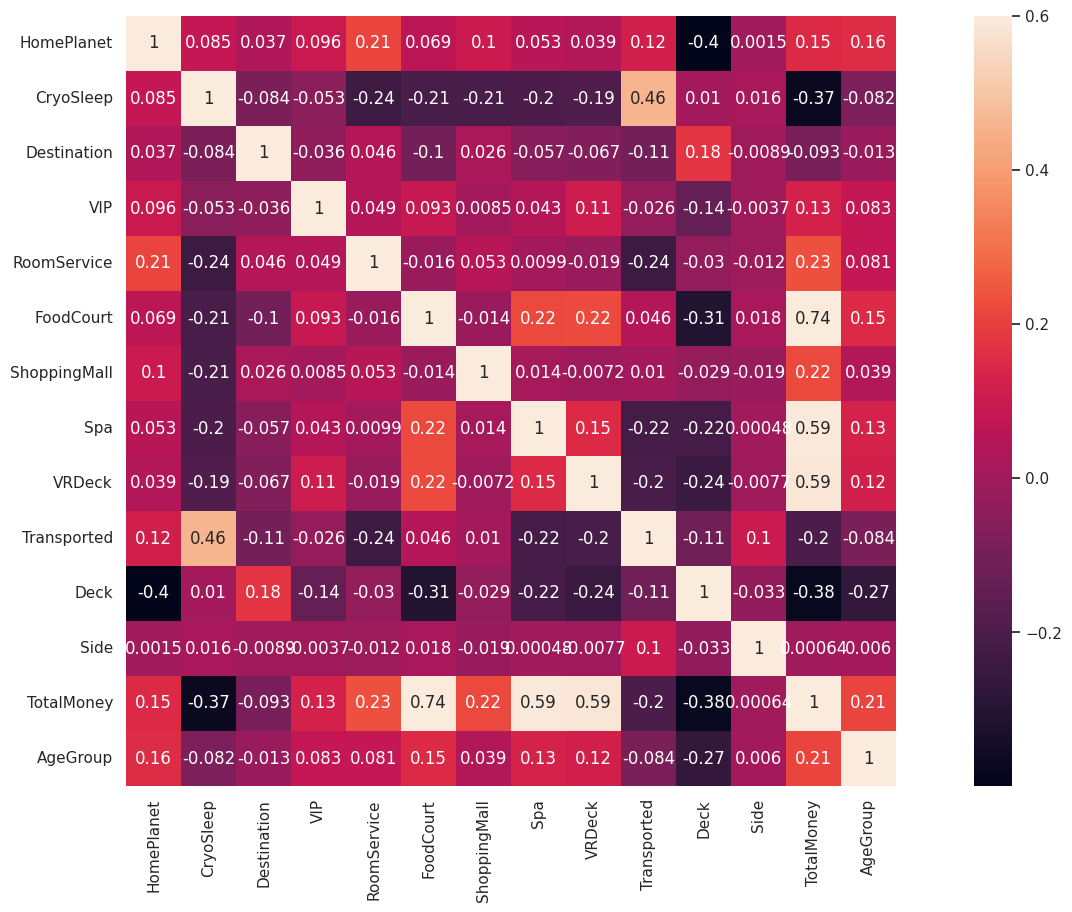

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(train1.corr(), vmax=0.6, square=True, annot=True)

The columns are most affected: CryoSleep, RoomService, Spa, VRDeck, TotalMoney

The columns are the least affected: VIP, FoodCourt, ShoppingMall. They can be deleted

In [24]:
train = pd.get_dummies(train, columns=ohe_col)
test = pd.get_dummies(test, columns=ohe_col)

In [25]:
drop_col = ['VIP', 'FoodCourt', 'ShoppingMall']
train = train.drop(columns=drop_col)
test = test.drop(columns=drop_col)

## Result

In [26]:
train.head()

,CryoSleep,RoomService,Spa,VRDeck,Transported,Side,TotalMoney,HomePlanet_0,HomePlanet_1,HomePlanet_2,...,Deck_4,Deck_5,Deck_6,Deck_7,AgeGroup_0,AgeGroup_1,AgeGroup_2,AgeGroup_3,AgeGroup_4,AgeGroup_5
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,0,0.000000,0.000000,0.000000,0,0,0.000000,False,True,False,...,False,False,False,False,False,False,False,False,True,False
0002_01,0,0.007608,0.024500,0.001823,1,1,0.020452,True,False,False,...,False,True,False,False,False,False,True,False,False,False
0003_01,0,0.003001,0.299670,0.002030,0,1,0.288521,False,True,False,...,False,False,False,False,False,False,False,False,False,True
0003_02,0,0.000000,0.148563,0.007997,0,1,0.143830,False,True,False,...,False,False,False,False,False,False,False,False,True,False
0004_01,0,0.021149,0.025214,0.000083,1,1,0.030317,True,False,False,...,False,True,False,False,False,True,False,False,False,False


In [27]:
test.head()

,CryoSleep,RoomService,Spa,VRDeck,Side,TotalMoney,HomePlanet_0,HomePlanet_1,HomePlanet_2,Destination_0,...,Deck_4,Deck_5,Deck_6,Deck_7,AgeGroup_0,AgeGroup_1,AgeGroup_2,AgeGroup_3,AgeGroup_4,AgeGroup_5
PassengerId,,,,,,,,,,,,,,,,,,,,,
0013_01,1,0.000000,0.000000,0.000000,1,0.000000,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
0018_01,0,0.000000,0.142260,0.000000,1,0.084120,True,False,False,False,...,False,True,False,False,False,False,True,False,False,False
0019_01,1,0.000000,0.000000,0.000000,1,0.000000,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
0021_01,0,0.000000,0.009121,0.026266,1,0.220341,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
0023_01,0,0.000865,0.000000,0.000000,1,0.019159,True,False,False,False,...,False,True,False,False,False,False,True,False,False,False


<Axes: >

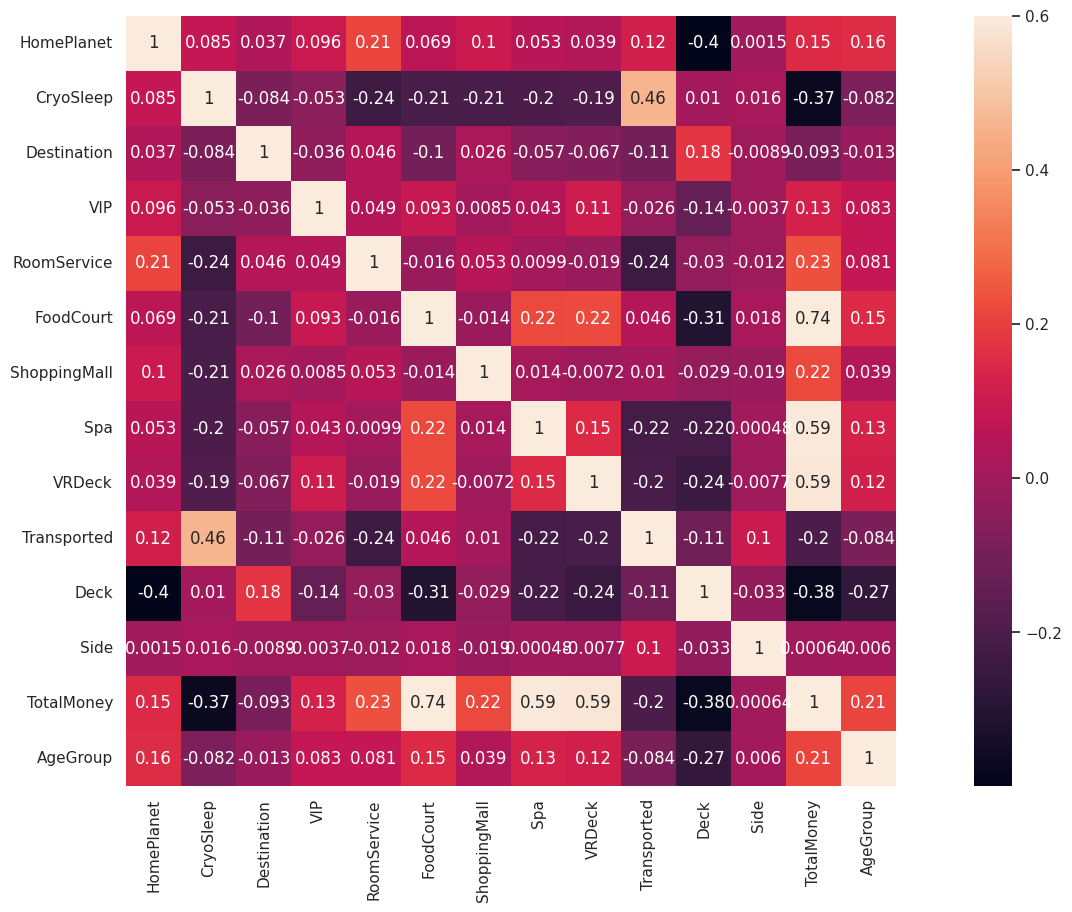

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(train1.corr(), vmax=0.6, square=True, annot=True)